# "From Tokenization To ChatGPT - Early Language Models"
- toc: true
- branch: master
- badges: true
- comments: true
- author: Tyler Carmichael
- categories: [Python, Pytorch, deep learning, NLP]

Last modified: June 26, 2023

Before reading this blog, it is recommended to be familiar with natural language processing concepts in week 11 of ENDG 411 and week 12 of ENDG 410. This blog focuses on advanced topics with PyTorch modelling, embedding and tokenization. This will help greatly in understanding this blog post.

More information using fastai is covered in *Chapter 10: NLP Deep Dive: RNNs Introduction to (and including) Chapter 10: Text Preprocessing Pages 329 - 338.* N-Gram models are covered in Chapter 7 Working with text data - 7.7 Bag of Words with more than one word Pages 329-350.

## Blog Goal

This blog will focus on natural language processing based on the concepts covered in the Digital Engineering 411 course. This blog moves the goalpost of the program from a sentiment analysis and basic tokenization up to natural language technology up to June, 2023. The outcome of the blog is to:

1. Become more familiarized with natural language processing principles.
1. Explore and create several different language model architectures using PyTorch and Tensorflow.

During this blog, Google Colab is used to create, train, and run models. Google Colab can be found at https://colab.research.google.com/.

## What Is Natural Language Processing and ChatGPT

Natural language processing (NLP) is an interdisciplinary field of linguistics, computer science, and artificial intelligence, which focuses on the ability for a computer to interact with human language. Since languages have structure, computers can learn to interpret the structure and accurately recreate that structure. The structure is useful in sentimental analysis, speech recognition, language translations, or even predicting test (in other words, the creation of a chat bot). Chat bots have existed since 1940s and today the most advanced form is ChatGPT.

# Evolution Of NLP

### Before Statistic Based NLP
The field of natural language processing (NLP), began in the 1940s through language translators. By 1958, researchers found issues with identifying grammar. Between 1957-1970, two divisions of research were created for NLP: symbolic and stochastic. Symbolic research focused on formal language and creating syntax. The other, stochastic research focused on statistical and probabilistic methods.

After 1970, NLP research split further. There were logic-based encoding and language mathematical models (a programming language known as "Prolog"). Another type of research "Natural language understanding", developed by Professor Terry Winograd, placed a computer "in a world of blocks", enabling the computer to manipulate and answer questions about the blocks according to language instructions otherwise known as SHDRLU. This was one of the first noted machine learning models for NLP. The first recurrent neural networks (RNNs) were also trained during this time period with the first adaptive RNN architecture developed by Shun'ichi Amari in 1972.

From 1983 to 1993 onward, research favored probabilistic and deterministic models. One of the famous systems was MYCLIN, which was for diagnosing blood infections. This favor toward statistical models was further reinforced by extracting data from information across the Internet (which began in the 1960s).

#  Fundamental Language Models
The term "language model" describes probabilistic and deterministic statistical model which focus on creating structured language. The main principle of language models is the reliance on Markov chains, which started with n-gram models ("n", representing the number of words which comes before a word). The Markov process is useful, since recurrent neural networks (RNNs) and transformer models rely heavily on it.

Language models can be described as an entropy statistical model. Entropy is a relative calculation which describes the order of a state, in the form of probabilities. The idea is that there is a calculable value in different words and sentences (i.e. the structure of language can be calculated). To accomplish this, a Markov chain calculation can be done.

## n-gram

An n-gram model is based on a formula that describes the probability of the next word that occurs based on the probability of previous word(s). This can be abstracted using a Markov process. The formula for this is:

> $P(w_{1},...,w_{m})=\prod_{i=1}^{m}P(w_{i}|w_{1},...,w_{i-1})\approx\prod_{i=2}^{m}P(w_{i-(n-1)}|w_{1},...,w_{i-1})$

For example, for n = 2 and i = 2, then the result is:

> $P(w_{2}|w_{1})$


For a bigram model ("bi" refers to n=2), the probability for a sentence "the quick brown fox" is:

> $P(the,quick,brown,fox)\approx P(the|<sos>)P(quick|the)P(brown|quick)P(fox|brown)P(<eos>|fox)$

Where:
*    \<sos\> represents the start of a sentence.
*    \<eos\> represents the end of a sentence.

### Exponential Representation

Statistical variations using n-gram models were made by the generalized function

> $P(w{i}|w_{1},...,w_{i-1})= \frac{1}{Z(w_{1},...,w_{i-1})} exp(a^{T}f(w_{1},...,w_{i}))$

Where:

*   $Z(w_{1},...,w_{i-1})$ represents a partition function used to normalize the probability.

*   "a" is a parameter vector.
*   $f(w_{1},...,w_{i})$ is a feature function.

This is otherwise known as a log-bilinear model.

#  Language Model Building Blocks

## Recurrent Neural Networks (RNN)

RNNs are a class of neural networks that can be described as blocks that create a state that may be cycled many times. This means that the black box acts as its own model. Let's call the RNN a black box. When we put data into the black box, the black box saves its state (memory). When the next item in the input data is added to the black box, the saved state of the black box interacts with this item, and updates its state again. This means for every item added, the previous items have an impact on the state and output of subsequent items. This is a time dependent property of RNNs. This follows a Markov process if the block is used to produce the probability of a word based on previous words.

> Unlike feedforward neural networks (FFNN) such as deep neural
networks (DNNs), the architecture of recurrent neural networks
(RNNs) have cycles feeding the activations from previous time steps
as input to the network to make a decision for the current input.

The most basic interpretation of an RNN can be depicted in the following diagram:

![alt text](natural_language_processing/Recurrent_neural_network_unfold.png "https://en.wikipedia.org/wiki/Recurrent_neural_network#/media/File:Recurrent_neural_network_unfold.svg")

Picture "x" as one item in a 1D array. "h" represents the RNN block. We have "v" which represents the "saved" state of the block, which is passed on to each item in "x" after "U" operation. The output "o" is are target vector after "W" operation inside the block.

There's not "one way" to design an RNN block. The main takeaway is that the block produces memory states that can be repeated over the entire length of input data.

### Long Short-Term Memory (LSTM)

LSTMs were designed to avoid the vanishing gradient problem. The vanishing gradient problem is an issue in deep learning where weights in a neural network cannot be updated due to the gradient of the loss to the weight being too small (i.e. the change of the weight is almost 0 for any input).

LSTMs were first developed in 1995, by Sepp Hochreiter and Jürgen Schmidhuber.

The architecture is broken down in the following:

![alt text](natural_language_processing/1920px-Long_Short-Term_Memory.PNG "https://en.wikipedia.org/wiki/Recurrent_neural_network#/media/File:Long_Short-Term_Memory.svg")

1. "F" is a forget gate (a neural network using sigmoid)

1. "I" is an input gate (a neural network using sigmoid)

1. "O" is an output gate (a neural network using sigmoid)

1. "H" is a hidden state vector

1. "C" is a memory state vector

The input to an LSTM is "x", "C" and "H". both the memory state and hidden state are created in the LSTM. When the LSTM starts its cycle, "C" and "H" are both vectors filled with zeros, which are updated when more items are added. The math can be broken down further (https://arxiv.org/pdf/1402.1128.pdf).

PyTorch has a class for LSTMs:

```
torch.nn.LSTM(*args, **kwargs)
```



## Tokenization And Embedding

A few concepts need to be recalled before moving forward. Tokenization is a process to convert a string into a list of tokens. This list contains a combination of words, punctuation, capitalization, the start or ending of the sentence to represent the entire sentence structure. This is useful since we want a model that can stop after a certain number of words. This list of tokens, which gets converted into a list of numbers, is then used as an input in language models.

For example, we can use the following sentence:



> "The US dollar \$1 is \$1.00."

Using the tokenizer function "WordTokenizer()" in torchtext.data.utils (PyTorch) creates the following array using the default spacy tokenizer:

> $['The',\ 'U.S.',\ 'dollar',\ '\$',\ '1',\ 'is',\ '\$',\ '1.00',\ '.']$

Based on the above, the function "WordTokenizer()" has organized the sentence into a format that can be converted into a token. Each token can be converted into a unique number saved in a dictionary of tokens. Likewise, the unique number can be converted back into a token. For a blank dictionary, adding each item in the list would look like:



> $[1,\ 2,\ 3,\ 4,\ 5,\ 6,\ 4,\ 7,\ 8]$

When a language model receives this list, a function called embedding will map the list into a higher dimensional category vector. in PyTorch, the specific function is:
```
torch.nn.Embedding(vocab_size, embedding_dim)
```
Where "vocab_size" is our dictionary, and "embedding_dim" is the size of the mapping vector, which is a 1D array. In the example above, we have 8 items in our dictionary, which can be mapped to "embedding_dim". The output changes depending on whether we use a 2D or 1D array later on.

 This mapping can be generalized using the expression:

$f:X\rightarrow Y$

Tokenization and embedding are used in all language models.

# Architectures And Training

There are a few language model architectures that will be created in this blog, starting from the simplest language model up to more complicated models that use transformers. These are the architectures:
1. N-Gram
1. LSTM (single RNN)
1. Continuous Bag Of Words
1. Skip-Gram

Each architecture follows the format:
1. A dataset class is created to manipulate data. This data is used as an input to each model.
1. A model class is created.
1. We run a process to train the model.
1. Where applicable, each architecture is evaluated.

Each model will use a Reddit joke dataset for training and evaluation. The data set can be found at https://github.com/amoudgl/short-jokes-dataset/blob/master/data/reddit-cleanjokes.csv.


## Libraries
PyTorch, otherwise known as "torch" is the most supported deep learning library for Python. It was developed by Meta AI in September 2016. Google Colab is used to train models for this blog since Google Colab offers a cloud environment that runs Python, and resources to run PyTorch using Tesla K80 GPUs.


In [1]:
# Base Python libraries
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

# PyTorch libraries
import torch
import torch.nn as nn
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader

# Google Colab
import gc
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Coding Early Language Model Architectures

Model performance will be stored in the dictionary "early_model_results". We can see how each model performs at the end of the blog.

In [2]:
early_model_results = {}

### Define Hyperparameters

For this blog, we set the hyperparameters as follows. This allows us to compare different architectures on a like-to-like basis.

In [3]:
#utility for reporting loss results
PRINT_LOSS_EVERY = 5

In [4]:
batch_size = 64 # how many independent sequences will we process in parallel
block_size = 256 # what is the maximum context length for predictions
MAX_EPOCHS = 81

learning_rate = 1e-4
n_embd = 384
hidden_layer_size = 128
lstm_size = 128

torch.manual_seed(1337)

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Training And Test Data

Conversation from Reddit data was used for this lab, following Learning To Summarize From Human Feedback (https://arxiv.org/pdf/2009.01325.pdf). Data was split 90% training, and 10% validation.

First, we need to get out data.

In [6]:
%cd /content/drive/My Drive/ENDG411/Natural Language Processing

/content/drive/My Drive/ENDG411/Natural Language Processing


In [7]:
joke_filepath = 'reddit-cleanjokes.csv'

Let's import the data and see what the head of the data looks like.

In [8]:
joke_data = pd.read_csv(joke_filepath)
joke_data.head()

,ID,Joke
0,1,What did the bartender say to the jumper cable...
1,2,Don't you hate jokes about German sausage? The...
2,3,Two artists had an art contest... It ended in ...
3,4,Why did the chicken cross the playground? To g...
4,5,What gun do you use to hunt a moose? A moosecut!


In this case, all we really need is the list of words.

In [9]:
jokes = joke_data['Joke'].str.cat(sep=' ').split(' ')

In [10]:
print(len(jokes))
print(jokes[:5])

23914
['What', 'did', 'the', 'bartender', 'say']


Normally in natural language processing, words are tokenized. This means that words are placed in a dictionary.

In [11]:
uniq_words = Counter(jokes)

In [12]:
print(list(uniq_words.items())[:5])

[('What', 530), ('did', 279), ('the', 1057), ('bartender', 9), ('say', 124)]


Now we create our data set.

In [13]:
index_to_word = {index: word for index, word in enumerate(uniq_words)}
word_to_index = {word: index for index, word in enumerate(uniq_words)}
words_indexes = [word_to_index[w] for w in jokes]

Since we have our words tokenized, we will now split the data into a training and validation set.

## N-Gram Model (1900s)

The first architecture that will be explored is the N-Gram model. Normally, you would look at n-gram models for making "next word suggestions" on mobile devices. This model closely resembles the Markov process.

In [14]:
n_grams = 2

### Data Loader

torch.utils.data.Dataset in a class that can be used to create custom dataloaders. In this case, DatasetNGram() inherits the Dataset class to get batches of training and validation data for our n-gram model. This is useful in machine learning since we want to balance training speed and bias.

In [15]:
class DatasetNGram(torch.utils.data.Dataset):
    def __init__(self, words, main_dictionary, index_to_word, word_to_index,
                 word_indexes, n_grams):
        # This represents our set of data
        self.words = words
        self.uniq_words = main_dictionary
        self.index_to_word = index_to_word
        self.word_to_index = word_to_index
        self.words_indexes = word_indexes
        self.number_of_words = len(self.words_indexes)
        self.n_grams = n_grams

    def __len__(self):
        return len(self.words_indexes) - self.n_grams

    '''
    The index in this case represents a randomly generated number in a batch.
    We select a number of words, then the last word at index + self.n_grams + 1
    is the target.
    '''
    def __getitem__(self, index):
        # Indexing has an issue during training
        if index + self.n_grams + 1 < self.number_of_words:
            return (
            torch.tensor(self.words_indexes[index:index + self.n_grams]),
            torch.tensor(self.words_indexes[index + self.n_grams + 1])
            )
        features = [self.words_indexes[i % self.number_of_words]
                    for i in range(index, index + self.n_grams)]
        index_target = (index + self.n_grams + 1) % self.number_of_words
        return (
            torch.tensor(features),
            torch.tensor(self.words_indexes[index_target]),
            )

### Model

There are two parts to this model. We need to initialize the model, and have a forward function.

In [16]:
class NGramLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_layer):
        super(NGramLanguageModel, self).__init__()
        self.context_size = context_size
        self.embedding_dim = embedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, vocab_size)

    def forward(self, inputs):
        # Embedding layer
        embeds = self.embeddings(inputs)

        # Reshape the matrix from 3D to 2D
        out = embeds.view((inputs.size(dim=0), self.context_size * self.embedding_dim))
        out = nn.functional.relu(self.linear1(out))
        out = self.linear2(out)
        out = nn.functional.log_softmax(out, dim=1)
        return out

### Training

In [17]:
# A dataset object contains all our data
training_dataset = DatasetNGram(jokes, uniq_words, index_to_word,
                      word_to_index, words_indexes, n_grams)

In [18]:
# A dataloader object is used to generate new batches
training_dataloader = DataLoader(
    training_dataset,
    batch_size=batch_size,
)

In [19]:
# The model is defined here
model = NGramLanguageModel(len(training_dataset.word_to_index), n_embd, n_grams,
                           hidden_layer_size)

# We set the model to train
model.train()

# Since this is a large classification problem, we want a cross entropy loss
# criterion
criterion = nn.CrossEntropyLoss()

# The optimizer which updates our weights is defined here
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# We will store results here to compare later on
local_results = ([], [], [])

for epoch in range(MAX_EPOCHS):
    loss = 0
    # We can get a new batch of data in training_dataloader
    for batch, (x, y) in enumerate(training_dataloader):
        optimizer.zero_grad()
        y_pred = model(x)
        log_probs = nn.functional.log_softmax(y_pred, dim=1)
        loss = criterion(log_probs, y)
        loss.backward()
        optimizer.step()

    # Every 5 epochs, we want to see how well the model performs
    if epoch % PRINT_LOSS_EVERY == 0:
        correct = torch.sum((torch.argmax(log_probs, dim=1) == y).int())
        accuracy = 100 * correct / batch_size
        print("Epoch: {}. Training Loss: {:.3f}. Accuracy: {:.1f}%"
            .format(epoch, loss.item(), accuracy))
        local_results[0].append(epoch)
        local_results[1].append(loss.item())
        local_results[2].append(accuracy)

# Add results to results dictionary
early_model_results['ngram-model'] = local_results

Epoch: 0. Training Loss: 8.061. Accuracy: 1.6%
Epoch: 5. Training Loss: 5.636. Accuracy: 3.1%
Epoch: 10. Training Loss: 4.294. Accuracy: 6.2%
Epoch: 15. Training Loss: 3.069. Accuracy: 21.9%
Epoch: 20. Training Loss: 2.323. Accuracy: 32.8%
Epoch: 25. Training Loss: 1.936. Accuracy: 39.1%
Epoch: 30. Training Loss: 1.673. Accuracy: 42.2%
Epoch: 35. Training Loss: 1.472. Accuracy: 42.2%
Epoch: 40. Training Loss: 1.311. Accuracy: 43.8%
Epoch: 45. Training Loss: 1.185. Accuracy: 48.4%
Epoch: 50. Training Loss: 1.092. Accuracy: 48.4%
Epoch: 55. Training Loss: 1.028. Accuracy: 48.4%
Epoch: 60. Training Loss: 0.983. Accuracy: 48.4%
Epoch: 65. Training Loss: 0.945. Accuracy: 48.4%
Epoch: 70. Training Loss: 0.920. Accuracy: 48.4%
Epoch: 75. Training Loss: 0.909. Accuracy: 48.4%
Epoch: 80. Training Loss: 0.896. Accuracy: 48.4%


If tokens cannot be found in our "word_to_index" string array, then an error will be created. Keep this in mind when designing a language model.

In [20]:
context = ["it","feel'st"]
words = torch.tensor([[word_to_index[w] for w in context]], dtype=torch.long)
output = model(words)

KeyError: ignored

Since we have a model now, we can use the model to create an inference and predict the next word.

In [21]:
context = ["the","Chicken"]
words = torch.tensor([[word_to_index[w] for w in context]], dtype=torch.long)

In [22]:
output = model(words)
print(model(words))
print(torch.argmax(output, dim=1).item())

next_word = {i for i in word_to_index if word_to_index[i]==torch.argmax(output, dim=1).item()}
print(next_word)

tensor([[ -5.9376,  -9.1431,  -0.1406,  ..., -47.4895, -36.1212, -39.2082]],
       grad_fn=<LogSoftmaxBackward0>)
2
{'the'}


An alternative way to see how the model performed is to check the top 10 words.

In [23]:
num_indexes = 10
indices = torch.topk(output.flatten(), num_indexes).indices
print(indices)
next_words_top_10 = [{i for i in word_to_index if word_to_index[i]==indices[j]} for j in range(num_indexes)]
print(next_words_top_10)

tensor([  2, 906,  70,   5, 163,   4,  32, 482, 101,  10])
[{'the'}, {'says'}, {'it'}, {'to'}, {'for'}, {'say'}, {'a'}, {'name'}, {'was'}, {'not'}]


The model is roughly 50% accurate by using two words.

## LSTM Model

The design of the LSTM RNN was meant to solve two problems:
- Vanishing Gradient
- Exploding Gradient

A vanishing or exploding gradient represent the same issue where a neural network fails to properly update its weights. Vanishing means that the training algorithm doesn't update the neural network's weights at all, while exploding means that the algorithm updates the neural network's weights too fast resulting in the neural network being too sensitive to small changes.

An example was taken from https://www.kdnuggets.com/2020/07/pytorch-lstm-text-generation-tutorial.html.

### Dataset

In [24]:
class LSTMDataset(torch.utils.data.Dataset):
    def __init__(self, words, main_dictionary, index_to_word, word_to_index,
                word_indexes, sequence_length):
        # Text data
        self.words = words
        self.uniq_words = main_dictionary
        self.index_to_word = index_to_word
        self.word_to_index = word_to_index
        self.words_indexes = word_indexes
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.words_indexes) - self.sequence_length

    '''
    This model is still relatively simple. We take a randomly generated number
    in a batch. The LSTM model in this case is taking a sequence and uses the
    sequence to select the next words.
    '''
    def __getitem__(self, index):
        return (
            torch.tensor(self.words_indexes[index:index+self.sequence_length]),
            torch.tensor(self.words_indexes[index+1:index+self.sequence_length+1]),
        )

### Model

In [25]:
class LSTMLanguageModel(nn.Module):
    def __init__(self, n_vocab, embedding_dim, lstm_size, n_layer,
                 sequence_length, hidden_layer):
        super(LSTMLanguageModel, self).__init__()
        self.lstm_size = lstm_size
        self.num_layers = n_layer
        self.embedding_dim = embedding_dim
        self.sequence_length = sequence_length
        self.n_vocab = n_vocab

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
        )

        # The main difference between this model and the previous n-gram model
        # is the RNN
        self.lstm = nn.LSTM(
            input_size=self.embedding_dim,
            hidden_size=self.lstm_size,
            num_layers=self.num_layers,
            dropout=0.2,
        )

        self.linear1 = nn.Linear(self.lstm_size, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, n_vocab)

    def forward(self, x, prev_state):
        embed = self.embedding(x)

        # In this case, we are saving both the output and state
        output, state = self.lstm(embed, prev_state)
        output = self.linear1(output)
        logits = self.linear2(output)
        return logits, state

    def init_state(self):
        return (torch.zeros(self.num_layers, self.sequence_length, self.lstm_size),
                torch.zeros(self.num_layers, self.sequence_length, self.lstm_size))

### Training

In [26]:
# We defined how many words we will use in this model.
sequence_length = 4

# Think of this parameter as stacking RNNs, or adding more neurons to a
# convolutional neural network.
lstm_layers = 1

In [27]:
training_dataset = LSTMDataset(jokes, uniq_words, index_to_word,
                               word_to_index, words_indexes, sequence_length)

training_dataloader = DataLoader(
    training_dataset,
    batch_size=batch_size,
)

We follow the same approach.

In [28]:
# The same procedure is taken to create the model and train the model
model = LSTMLanguageModel(len(training_dataset.word_to_index), n_embd, lstm_size,
                          lstm_layers, sequence_length, hidden_layer_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
local_results = ([], [], [])

# The same algorithm is used for training
for epoch in range(MAX_EPOCHS):
    # Initializing the state is important every epoch. This clears any "dead"
    # state from previous training data.
    state_h, state_c = model.init_state()
    for batch, (x, y) in enumerate(training_dataloader):
        optimizer.zero_grad()
        y_pred, (state_h, state_c) = model(x, (state_h, state_c))
        loss = criterion(y_pred.transpose(1, 2), y)
        state_h = state_h.detach()
        state_c = state_c.detach()

        loss.backward()
        optimizer.step()

    # Every 5 epochs, we want to see how well the model performs
    if epoch % PRINT_LOSS_EVERY == 0:
        y_acc = torch.argmax(torch.nn.functional.softmax(y_pred.transpose(1, 2), dim=1), dim=1)
        correct = torch.sum(torch.eq(y_acc, y).int())
        accuracy = 100 * correct / (batch_size * sequence_length)

        print("Epoch: {}. Training Loss: {:.3f}. Accuracy: {:.1f}%".format(
            epoch, loss.item(), accuracy))
        local_results[0].append(epoch)
        local_results[1].append(loss.item())
        local_results[2].append(accuracy)

# Add results to results dictionary
early_model_results['lstm-model'] = local_results

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0. Training Loss: 7.358. Accuracy: 4.7%
Epoch: 5. Training Loss: 6.008. Accuracy: 7.8%
Epoch: 10. Training Loss: 5.029. Accuracy: 12.5%
Epoch: 15. Training Loss: 4.147. Accuracy: 15.6%
Epoch: 20. Training Loss: 3.307. Accuracy: 17.6%
Epoch: 25. Training Loss: 2.492. Accuracy: 27.3%
Epoch: 30. Training Loss: 1.813. Accuracy: 42.6%
Epoch: 35. Training Loss: 1.157. Accuracy: 50.0%
Epoch: 40. Training Loss: 0.754. Accuracy: 53.1%
Epoch: 45. Training Loss: 0.487. Accuracy: 57.8%
Epoch: 50. Training Loss: 0.307. Accuracy: 57.8%
Epoch: 55. Training Loss: 0.195. Accuracy: 59.4%
Epoch: 60. Training Loss: 0.126. Accuracy: 59.4%
Epoch: 65. Training Loss: 0.088. Accuracy: 59.4%
Epoch: 70. Training Loss: 0.059. Accuracy: 59.4%
Epoch: 75. Training Loss: 0.042. Accuracy: 59.4%
Epoch: 80. Training Loss: 0.022. Accuracy: 59.4%


Since the LSTM model is larger in scope, more training is required.

In [29]:
def predict(dataset, model, text, next_words=100):
	words = text.split(' ')
	model.eval()
	state_h, state_c = model.init_state()
	for i in range(0, next_words):
		x = torch.tensor([[dataset.word_to_index[w] for w in words[i:]]])
		y_pred, (state_h, state_c) = model(x, (state_h, state_c))
		arcs = torch.argmax(torch.nn.functional.softmax(y_pred.transpose(1, 2), dim=1), dim=1)
		word = [training_dataset.index_to_word[w] for w in arcs[0].tolist()][-1]
		words = words + [word]

	return words

In [30]:
words = "Why did the chicken"

The results are a little more interesting.

In [31]:
print(predict(training_dataset, model, words))

['Why', 'did', 'the', 'chicken', 'awareness.', 'of', 'alphabet', 'birds', 'disappointed;', 'legs?', 'Lean', 'Beef!', 'Why', 'did', 'the', 'school', 'math', 'book', 'sad?', 'away', 'on', 'his', 'chickens?', 'Did', 'you', 'hear', 'about', 'a', 'boomerang', 'earlier.', "I'm", 'their', 'jokes', 'if', 'it', 'had', 'to', 'choose,', 'realization...', 'Currently,', 'to', 'be', 'cheesy', "They're", 'once', 'had', 'a', 'bit', 'of', 'mildew-', '-but', 'all', 'the', 'ball', '&lt;p&gt;', 'My', 'favorite', 'joke', 'was', 'without', 'joke', 'why', 'was', 'odors."', 'why', 'is', 'trying', 'to', 'her', 'son', 'on', 'a', 'roof,', 'they', 'said', 'I', "didn't", 'have', 'her', 'about', 'so', 'much?', 'Where', 'did', 'the', 'mechanic', 'go', 'when', 'he', 'lost', 'his', 'tractor?', "Where's", 'my', 'tractor?', 'What', 'do', 'you', 'call', 'a', 'fish', 'with', 'no', 'eyes?']


The accuracy of the LSTM model peaked at 60%. The training loss however continued to improve. We can see in the model that we have some coherent sentences.

In [32]:
state_h, state_c = model.init_state()
words_predict = words.split(' ')
manual_words = words_predict
print(manual_words)
x = torch.tensor([[training_dataset.word_to_index[w] for w in words_predict]])
y_pred, (state_h, state_c) = model(x, (state_h, state_c))
last_word_logits = y_pred[0][-1]

['Why', 'did', 'the', 'chicken']


In [38]:
num_indexes = 10
indices = torch.topk(y_pred, num_indexes).indices
print(manual_words)

arcs = torch.argmax(torch.nn.functional.softmax(y_pred.transpose(1, 2), dim=1), dim=1)
print(arcs[0].tolist())

word = [training_dataset.index_to_word[w] for w in arcs[0].tolist()][-1]
words_predict = words_predict + [word]
manual_words = manual_words + [word]

words_predict = words_predict[1:]

x = torch.tensor([[training_dataset.word_to_index[w] for w in words_predict]])
y_pred, (state_h, state_c) = model(x, (state_h, state_c))

arcs = torch.argmax(torch.nn.functional.softmax(y_pred.transpose(1, 2), dim=1), dim=1)
print("Word 2", [training_dataset.index_to_word[w] for w in arcs[0].tolist()])
print(manual_words)

['Why', 'did', 'the', 'chicken', 'awareness.', 'of', 'alphabet', 'birds', 'disappointed;']
[1733, 2, 58, 1294]
Word 2 ['the', 'the', 'getting', 'Lean']
['Why', 'did', 'the', 'chicken', 'awareness.', 'of', 'alphabet', 'birds', 'disappointed;', 'legs?']


## Continuous Bag Of Words And Skip Gram
Another architecture called Word2Vec was published in 2013 by Google (https://arxiv.org/pdf/1301.3781.pdf). Two embedding architectures were created. Both models function similarly but opposite directions.
- Continuous Bag Of Words (CBOW) models take a group of surrounding words, and tries to predict a missing or containing word. This is useful for finding missing contexts.
- Skip-gram models are a little more interesting. This model takes a word, and tries to predict the surrounding content.

Here's what the architecture looks like:

![alt text](natural_language_processing/word2vec.PNG "https://arxiv.org/pdf/1301.3781.pdf")

### Dataset

In [39]:
class CBOWDataset(torch.utils.data.Dataset):
    def __init__(self, words, unqi_words, index_to_word, word_to_index,
                 word_indexes, sequence_length):
        self.words = words
        self.uniq_words = unqi_words
        self.index_to_word = index_to_word
        self.word_to_index = word_to_index
        self.words_indexes = word_indexes
        self.number_of_words = sequence_length
        self.context_distance = sequence_length // 2

    def __len__(self):
        return len(self.words_indexes) - self.number_of_words

    '''
    This dataset looks for a word in between two sets of words.
    '''
    def __getitem__(self, index):
        words_left = []
        words_right = []

        for i in range(1, self.context_distance + 1):
            words_left.append(self.words_indexes[index - i])
            words_right.append(self.words_indexes[(index + i) %
                                                  self.number_of_words])
        #print(words_left + words_right)
        return (
            torch.tensor(words_left + words_right),
            torch.tensor(self.words_indexes[index]),
        )

### Model

In [40]:
class CBOWLanguageModel(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, sequence_length,
                 hidden_layer_size):
        super(CBOWLanguageModel, self).__init__()

        #out: 1 x emdedding_dim
        self.embedding_dim = embedding_dim
        self.sequence_length = sequence_length
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(self.sequence_length * embedding_dim,
                                 hidden_layer_size)
        self.activation_function1 = nn.ReLU()

        #out: 1 x vocab_size
        self.linear2 = nn.Linear(hidden_layer_size, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)

    def forward(self, inputs):
        #embeds = sum(self.embeddings(inputs)).view(1,-1)
        embeds = self.embeddings(inputs)
        out = embeds.view((inputs.size(dim=0), self.sequence_length *
                           self.embedding_dim))

        out = self.linear1(out)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

### Training

In [41]:
sequence_length = 4

In [42]:
training_dataset = CBOWDataset(jokes, uniq_words, index_to_word,
                               word_to_index, words_indexes, sequence_length)

In [43]:
training_dataloader = DataLoader(
    training_dataset,
    batch_size=batch_size,
)

In [44]:
model = CBOWLanguageModel(len(training_dataset.word_to_index), n_embd,
                          sequence_length, hidden_layer_size)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

local_results = ([],[],[])

for epoch in range(MAX_EPOCHS):
    for batch, (x, y) in enumerate(training_dataloader):
        optimizer.zero_grad()
        y_pred = model(x)
        log_probs = nn.functional.log_softmax(y_pred, dim=1)
        loss = criterion(log_probs, y)
        loss.backward()
        optimizer.step()

    # Every 5 epochs, we want to see how well we train
    if epoch % PRINT_LOSS_EVERY == 0:
        correct = torch.sum((torch.argmax(log_probs, dim=1) == y).int())
        accuracy = 100 * correct / batch_size
        print("Epoch: {}. Training Loss: {:.3f}. Accuracy: {:.1f}%".format(
            epoch, loss.item(),accuracy))
        local_results[0].append(epoch)
        local_results[1].append(loss.item())
        local_results[2].append(accuracy)

# Add results to results dictionary
early_model_results['cbow-model'] = local_results

Epoch: 0. Training Loss: 6.881. Accuracy: 4.7%
Epoch: 5. Training Loss: 4.907. Accuracy: 7.8%
Epoch: 10. Training Loss: 3.408. Accuracy: 21.9%
Epoch: 15. Training Loss: 2.117. Accuracy: 34.4%
Epoch: 20. Training Loss: 1.455. Accuracy: 40.6%
Epoch: 25. Training Loss: 1.091. Accuracy: 45.3%
Epoch: 30. Training Loss: 0.888. Accuracy: 45.3%
Epoch: 35. Training Loss: 0.775. Accuracy: 46.9%
Epoch: 40. Training Loss: 0.704. Accuracy: 46.9%
Epoch: 45. Training Loss: 0.659. Accuracy: 48.4%
Epoch: 50. Training Loss: 0.626. Accuracy: 48.4%
Epoch: 55. Training Loss: 0.601. Accuracy: 48.4%
Epoch: 60. Training Loss: 0.581. Accuracy: 48.4%
Epoch: 65. Training Loss: 0.564. Accuracy: 48.4%
Epoch: 70. Training Loss: 0.551. Accuracy: 46.9%
Epoch: 75. Training Loss: 0.540. Accuracy: 46.9%
Epoch: 80. Training Loss: 0.537. Accuracy: 46.9%


In [45]:
context = ["did","the","cross", "the"]
words = torch.tensor([[word_to_index[w] for w in context]], dtype=torch.long)

In [46]:
output = model(words)
print(model(words))
print(torch.argmax(output, dim=1).item())

next_word = {i for i in word_to_index if word_to_index[i]==torch.argmax(output, dim=1).item()}
print(next_word)

tensor([[ -9.8540, -11.6001,  -4.6046,  ..., -17.1337, -20.5839, -19.2433]],
       grad_fn=<LogSoftmaxBackward0>)
1485
{'tomato'}


In [47]:
num_indexes = 10
indices = torch.topk(output.flatten(), num_indexes).indices
print(indices)
next_words_top_10 = [{i for i in word_to_index if word_to_index[i]==indices[j]} for j in range(num_indexes)]
print(next_words_top_10)

tensor([1485, 3147, 1631,   36,  278,  482,  218,   60, 1898,    2])
[{'tomato'}, {'side'}, {'happy'}, {'cross'}, {'is'}, {'name'}, {'eight?'}, {'one'}, {'afraid'}, {'the'}]


### Skip Gram Model

In [48]:
sequence_length = 4

In [49]:
class skipgramDataset(torch.utils.data.Dataset):
    def __init__(self, words, unqi_words, index_to_word, word_to_index,
                 word_indexes, sequence_length):
        self.words = words
        self.uniq_words = unqi_words
        self.index_to_word = index_to_word
        self.word_to_index = word_to_index
        self.words_indexes = word_indexes
        self.number_of_words = len(words)
        self.context_distance = sequence_length

    def __len__(self):
        return len(self.words_indexes) - self.context_distance

    '''
    This dataset looks for a word in between two sets of words.
    '''
    def __getitem__(self, index):
        words_left = []
        for i in range(1, self.context_distance + 1):
            words_left.append(self.words_indexes[index - i])

        return (
            torch.tensor(self.words_indexes[index]),
            torch.tensor(self.words_indexes[index - 2]),
            torch.tensor(self.words_indexes[index - 1]),
            torch.tensor(self.words_indexes[(index + 1) % self.number_of_words]),
            torch.tensor(self.words_indexes[(index + 2) % self.number_of_words]),
        )

In [50]:
class skipgramLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_layer_size):
        super(skipgramLanguageModel, self).__init__()
        self.u_embeddings = nn.Embedding(vocab_size, embedding_dim)
        #self.v_embeddings = nn.Embedding(vocab_size, embedding_dim, sparse=True)
        self.embedding_dim = embedding_dim

        self.linear1 = nn.Linear(embedding_dim, hidden_layer_size)
        # Each word
        self.linearminus2 = nn.Linear(hidden_layer_size, vocab_size)
        self.linearminus1 = nn.Linear(hidden_layer_size, vocab_size)
        self.linearplus1 = nn.Linear(hidden_layer_size, vocab_size)
        self.linearplus2 = nn.Linear(hidden_layer_size, vocab_size)
        self.init_emb()

    def init_emb(self):
        initrange = 1.0 / self.embedding_dim
        self.u_embeddings.weight.data.uniform_(-initrange, initrange)

    def forward(self, input):
        embeds = self.u_embeddings(input)
        out = embeds.view((input.size(dim=0), self.embedding_dim))
        out = nn.functional.relu(self.linear1(out))

        # Get each word
        outminus2 = self.linearminus2(out)
        outminus1 = self.linearminus1(out)
        outplus1 = self.linearplus1(out)
        outplus2 = self.linearplus2(out)

        #Get the max value for each word
        outminus2 = nn.functional.log_softmax(outminus2, dim=1)
        outminus1 = nn.functional.log_softmax(outminus1, dim=1)
        outplus1 = nn.functional.log_softmax(outplus1, dim=1)
        outplus2 = nn.functional.log_softmax(outplus2, dim=1)

        return (outminus2, outminus1, outplus1, outplus2)

In [51]:
training_dataset = skipgramDataset(jokes, uniq_words, index_to_word,
                               word_to_index, words_indexes, sequence_length)

In [52]:
training_dataloader = DataLoader(
    training_dataset,
    batch_size=batch_size,
)

In [53]:
model = skipgramLanguageModel(len(word_to_index), n_embd, hidden_layer_size)

if torch.cuda.is_available():
      model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

local_results = ([], [], [])

for epoch in range(MAX_EPOCHS):
    for batch, (x, y_minus2, y_minus1, y_plus1, y_plus2) in enumerate(training_dataloader):
        optimizer.zero_grad()
        (y_predminus2, y_predminus1, y_predplus1, y_predplus2) = model(x)

        # Get the log probabilities for each word
        log_probs = nn.functional.log_softmax(y_predminus2, dim=1)
        loss = criterion(log_probs, y_minus2)

        log_probs2 = nn.functional.log_softmax(y_predminus1, dim=1)
        loss += criterion(log_probs2, y_minus1)

        log_probs3 = nn.functional.log_softmax(y_predplus1, dim=1)
        loss += criterion(log_probs3, y_plus1)

        log_probs4 = nn.functional.log_softmax(y_predplus2, dim=1)
        loss += criterion(log_probs4, y_plus2)

        # We run our loss function here
        loss.backward()
        optimizer.step()

    # Every 5 epochs, we want to see how well the model performs
    if epoch % PRINT_LOSS_EVERY == 0:
        correct = 0
        correct += torch.sum((torch.argmax(log_probs, dim=1) == y_minus2).int())
        correct += torch.sum((torch.argmax(log_probs2, dim=1) == y_minus1).int())
        correct += torch.sum((torch.argmax(log_probs3, dim=1) == y_plus1).int())
        correct += torch.sum((torch.argmax(log_probs4, dim=1) == y_plus2).int())

        accuracy = 100 * correct / (batch_size * 4)
        print("Epoch: {}. Training Loss: {:.3f}. Accuracy: {:.1f}%".format(
            epoch, loss.item(), accuracy))
        local_results[0].append(epoch)
        local_results[1].append(loss.item())
        local_results[2].append(accuracy)

early_model_results['skipgram-model'] = local_results

Epoch: 0. Training Loss: 33.313. Accuracy: 2.0%
Epoch: 5. Training Loss: 27.101. Accuracy: 3.1%
Epoch: 10. Training Loss: 25.324. Accuracy: 5.5%
Epoch: 15. Training Loss: 23.017. Accuracy: 7.0%
Epoch: 20. Training Loss: 21.552. Accuracy: 8.2%
Epoch: 25. Training Loss: 20.119. Accuracy: 9.8%
Epoch: 30. Training Loss: 18.620. Accuracy: 10.5%
Epoch: 35. Training Loss: 17.129. Accuracy: 10.9%
Epoch: 40. Training Loss: 15.652. Accuracy: 12.5%
Epoch: 45. Training Loss: 14.212. Accuracy: 15.2%
Epoch: 50. Training Loss: 12.820. Accuracy: 19.5%
Epoch: 55. Training Loss: 11.715. Accuracy: 22.3%
Epoch: 60. Training Loss: 10.986. Accuracy: 24.2%
Epoch: 65. Training Loss: 10.543. Accuracy: 25.4%
Epoch: 70. Training Loss: 10.211. Accuracy: 25.8%
Epoch: 75. Training Loss: 9.945. Accuracy: 27.0%
Epoch: 80. Training Loss: 9.737. Accuracy: 27.7%


We will test this model by using the sentence "why did the chicken cross the road". In this case, we are looking for "did the" and "cross the" using the word "chicken".

In [54]:
context = ["did","the","cross", "the"]
words = torch.tensor([[word_to_index["chicken"]]], dtype=torch.long)

In [55]:
y1, y2, y3, y4 = model(words)
print(torch.argmax(y1, dim=1).item())

word_minus2 = {i for i in word_to_index if word_to_index[i]==torch.argmax(y1, dim=1).item()}
word_minus1 = {i for i in word_to_index if word_to_index[i]==torch.argmax(y2, dim=1).item()}
word_plus1 = {i for i in word_to_index if word_to_index[i]==torch.argmax(y3, dim=1).item()}
word_plus2 = {i for i in word_to_index if word_to_index[i]==torch.argmax(y4, dim=1).item()}
print([word_minus2, word_minus1, word_plus1, word_plus2])

1
[{'did'}, {'the'}, {'cross'}, {'the'}]


This model is impressive.

### Comparing Old Models

Since we have data on the old models, we can roughly compare the results of each model on a plot.

The results for our early models:
Model: ngram-model. Score: 0.8958367109298706.
Model: lstm-model. Score: 0.022056899964809418.
Model: cbow-model. Score: 0.537187397480011.
Model: skipgram-model. Score: 9.736570358276367.



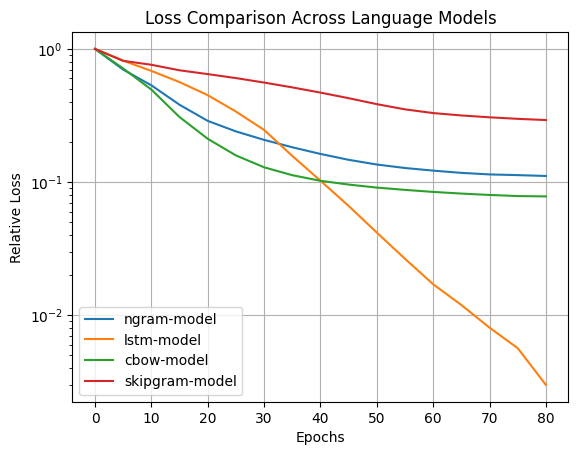

In [58]:
plt.figure(0)
labels = list(early_model_results.keys())

print("The results for our early models:")
for j, plot_data in enumerate(early_model_results.values()):
  print("Model: {}. Score: {}.".format(labels[j],plot_data[1][-1]))
  max_num = max(plot_data[1])
  if max(plot_data[1]) < 0.0001:
      max_num = 1
  output_data = [i/max_num for i in plot_data[1]]
  plt.plot(plot_data[0], output_data, label = labels[j])

print("")
plt.title("Loss Comparison Across Language Models")
plt.xlabel("Epochs")
plt.ylabel("Relative Loss")
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

And now we compare the output accuracy for each model. The LSTM model did the best in terms of accuracy, and its loss. Suprisingly, it looks the model can continue to learn.

Accuracy results for our early models:
Model: ngram-model. Accuracy: 48.4375.
Model: lstm-model. Accuracy: 59.375.
Model: cbow-model. Accuracy: 46.875.
Model: skipgram-model. Accuracy: 27.734375.



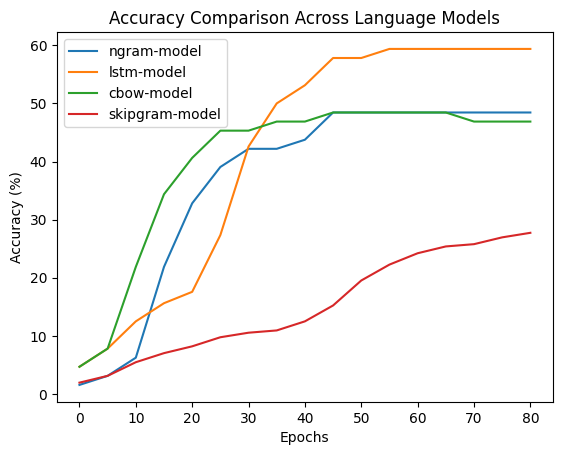

In [57]:
plt.figure(0)
labels = list(early_model_results.keys())

print("Accuracy results for our early models:")
for j, plot_data in enumerate(early_model_results.values()):
  print("Model: {}. Accuracy: {}.".format(labels[j],plot_data[2][-1]))
  plt.plot(plot_data[0], plot_data[2], label = labels[j])

print("")
plt.title("Accuracy Comparison Across Language Models")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

## Going Forward With Large Language Models
The architectures explored in this blog are powerful tools for predicting words. Four different architectures were built and examined.Some improvements that could be made is adding cross-validation and an adjusted learning rate to further improve each model.

Moving forward, creating a more complicated language model can be done by organizing RNNs together and creating a new RNN called a generative pre-trained transformer. This will be in part 2.

#### Different Resources For Stating Paths
- https://github.com/openai/gpt-2
- https://en.wikipedia.org/wiki/Seq2seq
- https://docs.chainer.org/en/stable/examples/seq2seq.html
- https://github.com/karpathy/ng-video-lecture




# References
1. *Chapter 10: NLP Deep Dive: RNNs Introduction to (and including) Chapter 10: Text Preprocessing Pages 329 - 338*

1. Chapter 7. Working with text data - 7.7 Bag of Words with more than one word (p.329-350)

1. "Foundations of Statistical Natural Language Processing. By Christopher D. Manning, Hinrich Schiitze"

1. https://en.wikipedia.org/wiki/N-gram_language_model

1. https://aclanthology.org/P06-1092.pdf

1. https://cs.stanford.edu/people/eroberts/courses/soco/projects/2004-05/nlp/overview_history.html

1. https://medium.com/nlplanet/a-brief-timeline-of-nlp-bc45b640f07d

1. https://www.researchgate.net/publication/3191800_Cache-based_natural_language_model_for_speech_recognition

1. https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

1. https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html

1. "Generating Sequences With Recurrent Neural Networks Alex Graves"

1. https://medium.datadriveninvestor.com/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577

1. https://www.kdnuggets.com/2020/07/pytorch-lstm-text-generation-tutorial.html

1. https://en.wikipedia.org/wiki/Word2vec#:~:text=Word2vec%20is%20a%20technique%20for,words%20for%20a%20partial%20sentence

1. https://www.fit.vut.cz/study/phd-thesis-file/283/283.pdf

1. https://medium.datadriveninvestor.com/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577